In [3]:
import pandas as pd
from ipycanvas import Canvas, hold_canvas
import numpy as np
from pathlib import Path
from Player import Player
from Route import Route
import Metric
import Model

In [4]:
%load_ext autoreload
%autoreload 2

In [63]:
player_pos = pd.read_csv("2024_SMT_Data_Challenge\player_pos\Season_1884\Home1A\Vis1AK\day_008\player_pos.csv")
game_info = pd.read_csv("2024_SMT_Data_Challenge\game_info\Season_1884\Home1A\Vis1AK\day_008\game_info.csv")
ball_pos = pd.read_csv("2024_SMT_Data_Challenge\\ball_pos\Season_1884\Home1A\Vis1AK\day_008\\ball_pos.csv")
game_events = pd.read_csv("2024_SMT_Data_Challenge\game_events\Season_1884\Home1A\Vis1AK\day_008\game_events.csv")

In [64]:
game_events[(game_events["event_code"] == 2) & (game_events["player_position"] == 8)]

game_str  play_id  at_bat  play_per_game  timestamp  \
31   1884_008_Vis1AK_Home1A        6      24              6     296628   
132  1884_008_Vis1AK_Home1A       37      30             37    1297528   
314  1884_008_Vis1AK_Home1A       83      43             83    2963626   
437  1884_008_Vis1AK_Home1A      112      51            112    3875826   
451  1884_008_Vis1AK_Home1A      115      52            115    3943226   
540  1884_008_Vis1AK_Home1A      139      57            139    4931426   
627  1884_008_Vis1AK_Home1A      160      64            160    5863626   
676  1884_008_Vis1AK_Home1A      169      67            169    6221276   
728  1884_008_Vis1AK_Home1A      181      73            181    6675126   
758  1884_008_Vis1AK_Home1A      190      75            190    7009776   
819  1884_008_Vis1AK_Home1A      200      82            200    7544326   
836  1884_008_Vis1AK_Home1A      203      84            203    7633826   

     player_position  event_code  
31                 8           2  
132                8           2  
314                8           2  
437                8           2  
451                8           2  
540                8           2  
627                8           2  
676                8           2  
728                8           2  
758                8           2  
819                8           2  
836                8           2

In [65]:
play6 = game_events[game_events["play_id"] == 6]

In [66]:
play6abridged = play6.merge(ball_pos, on = "timestamp")

In [67]:
play6abridged = play6abridged.merge(player_pos, on = ["timestamp", "player_position"], suffixes= ("y",))

In [68]:
play6abridged = play6abridged[["play_id_x", "timestamp", "player_position", "event_code", "ball_position_x", "ball_position_y", "ball_position_z", "field_x", "field_y"]]

In [69]:
play6

game_str  play_id  at_bat  play_per_game  timestamp  \
29  1884_008_Vis1AK_Home1A        6      24              6     290678   
30  1884_008_Vis1AK_Home1A        6      24              6     291078   
31  1884_008_Vis1AK_Home1A        6      24              6     296628   
32  1884_008_Vis1AK_Home1A        6      24              6     297678   
33  1884_008_Vis1AK_Home1A        6      24              6     299428   
34  1884_008_Vis1AK_Home1A        6      24              6     299578   
35  1884_008_Vis1AK_Home1A        6      24              6     301228   

    player_position  event_code  
29                1           1  
30               10           4  
31                8           2  
32                8           3  
33              255          16  
34                6           2  
35                0           5

In [70]:
df = play6.merge(game_info, on = "play_per_game", suffixes = ["_a", "_b"])
df = df.merge(ball_pos, on = "timestamp", suffixes= ["_c", "_d"])
df = df.merge(player_pos, on = "timestamp", suffixes= ["_e", "_f"])
play6[play6["event_code"] == 2]["player_position"].iloc[0]
291078	

291078

In [71]:
play6

game_str  play_id  at_bat  play_per_game  timestamp  \
29  1884_008_Vis1AK_Home1A        6      24              6     290678   
30  1884_008_Vis1AK_Home1A        6      24              6     291078   
31  1884_008_Vis1AK_Home1A        6      24              6     296628   
32  1884_008_Vis1AK_Home1A        6      24              6     297678   
33  1884_008_Vis1AK_Home1A        6      24              6     299428   
34  1884_008_Vis1AK_Home1A        6      24              6     299578   
35  1884_008_Vis1AK_Home1A        6      24              6     301228   

    player_position  event_code  
29                1           1  
30               10           4  
31                8           2  
32                8           3  
33              255          16  
34                6           2  
35                0           5

In [72]:
play6coords = player_pos[(player_pos["player_position"] == 8) & (player_pos["timestamp"] >= 291078) & (player_pos["timestamp"] <= 296628)]
#list(zip(play6coords["field_x"], play6coords["field_y"]))
play6coords

game_str  play_id  timestamp  player_position  field_x  \
5193  1884_008_Vis1AK_Home1A        6     291078                8  -4.7460   
5207  1884_008_Vis1AK_Home1A        6     291128                8  -4.6383   
5221  1884_008_Vis1AK_Home1A        6     291178                8  -4.5210   
5235  1884_008_Vis1AK_Home1A        6     291228                8  -4.3929   
5249  1884_008_Vis1AK_Home1A        6     291278                8  -4.2525   
...                      ...      ...        ...              ...      ...   
6691  1884_008_Vis1AK_Home1A        6     296428                8  82.1850   
6705  1884_008_Vis1AK_Home1A        6     296478                8  82.7688   
6719  1884_008_Vis1AK_Home1A        6     296528                8  83.3565   
6733  1884_008_Vis1AK_Home1A        6     296578                8  83.4822   
6747  1884_008_Vis1AK_Home1A        6     296628                8  83.6010   

       field_y  
5193  286.0152  
5207  285.9066  
5221  285.7980  
5235  285.6909  
5249  285.5865  
...        ...  
6691  321.0192  
6705  321.3156  
6719  321.6087  
6733  321.6708  
6747  321.7311  

[112 rows x 6 columns]

In [73]:
# canv = Canvas(width  = 400, height = 400)
# canv.scale(x = 1, y = -1)
# canv.translate(x = canv.width / 2, y = -canv.height)
# colors = np.array(range(play6coords.shape[0])) * 255 / play6coords.shape[0]
# colors = list(map(lambda x: ([255 - x, 255 - x, 255]), colors))
# canv.fill_styled_circles(play6coords["field_x"].to_numpy(), play6coords["field_y"].to_numpy(), color = colors, radius = 1)
# canv

In [74]:
play6

game_str  play_id  at_bat  play_per_game  timestamp  \
29  1884_008_Vis1AK_Home1A        6      24              6     290678   
30  1884_008_Vis1AK_Home1A        6      24              6     291078   
31  1884_008_Vis1AK_Home1A        6      24              6     296628   
32  1884_008_Vis1AK_Home1A        6      24              6     297678   
33  1884_008_Vis1AK_Home1A        6      24              6     299428   
34  1884_008_Vis1AK_Home1A        6      24              6     299578   
35  1884_008_Vis1AK_Home1A        6      24              6     301228   

    player_position  event_code  
29                1           1  
30               10           4  
31                8           2  
32                8           3  
33              255          16  
34                6           2  
35                0           5

In [76]:
r = Route(play6, player_pos, ball_pos, game_info)

In [77]:
Player.get_existing_players()[8743].get_levels()

{'1A': 9}

In [78]:
r.get_total_length()

96.96957488866856

In [79]:
r.get_ideal_length()

95.29332569393306

In [80]:
r.get_score()

0.9827136584164671

In [81]:
(play6["player_position"] >= 7) & (play6["player_position"] <= 9) & (play6["event_code"] == 2)

29    False
30    False
31     True
32    False
33    False
34    False
35    False
dtype: bool

In [593]:
relevant_plays_df = game_events.groupby("play_per_game").filter(Metric.route_eff_rel)

In [594]:
relevant_plays_df

game_str  play_id  at_bat  play_per_game  timestamp  \
9    1884_008_Vis1AK_Home1A        4      22              4      88378   
10   1884_008_Vis1AK_Home1A        4      22              4      88778   
11   1884_008_Vis1AK_Home1A        4      22              4      92978   
12   1884_008_Vis1AK_Home1A        4      22              4      93078   
13   1884_008_Vis1AK_Home1A        4      22              4      93778   
..                      ...      ...     ...            ...        ...   
835  1884_008_Vis1AK_Home1A      203      84            203    7631926   
836  1884_008_Vis1AK_Home1A      203      84            203    7633826   
837  1884_008_Vis1AK_Home1A      203      84            203    7636276   
838  1884_008_Vis1AK_Home1A      203      84            203    7637026   
839  1884_008_Vis1AK_Home1A      203      84            203    7637876   

     player_position  event_code  
9                  1           1  
10                10           4  
11               255          16  
12                 9           9  
13               255          16  
..               ...         ...  
835              255          16  
836                8           2  
837                8           3  
838                6           2  
839                0           5  

[171 rows x 7 columns]

In [270]:
4 not in game_events["event_code"].values

False

In [272]:
Player.clear_existing_players()
for play_num in relevant_plays_df["play_per_game"].unique():
    Route(relevant_plays_df[relevant_plays_df["play_per_game"] == play_num], player_pos, ball_pos, game_info)

Players cleared


In [273]:
Player.get_existing_players()

{5599: <Player.Player at 0x19fc69cec80>,
 8743: <Player.Player at 0x19fc69ce410>,
 963: <Player.Player at 0x19fc69cdc00>,
 537: <Player.Player at 0x19fc69cd3f0>,
 435: <Player.Player at 0x19fc69cc430>,
 5485: <Player.Player at 0x19fc7852530>}

In [627]:
Player.get_existing_players()[537].get_routes()[0].visualize()

Canvas(height=400, width=400)

In [86]:
play6.head((play6.reset_index()["event_code"] == 2).idxmax())

game_str  play_id  at_bat  play_per_game  timestamp  \
29  1884_008_Vis1AK_Home1A        6      24              6     290678   
30  1884_008_Vis1AK_Home1A        6      24              6     291078   

    player_position  event_code  
29                1           1  
30               10           4

In [87]:
# import pygame
# pygame.init()
# screen = pygame.display.set_mode((1280, 720))
# clock = pygame.time.Clock()
# running = True

# while running:
#     # poll for events
#     # pygame.QUIT event means the user clicked X to close your window
#     for event in pygame.event.get():
#         if event.type == pygame.QUIT:
#             running = False

#     # fill the screen with a color to wipe away anything from last frame
#     screen.fill("purple")

#     # RENDER YOUR GAME HERE
#     pygame.draw.circle(screen, (0, 0, 0), (0, 0), 10)

#     # flip() the display to put your work on screen
#     pygame.display.flip()

#     clock.tick(60)  # limits FPS to 60

# pygame.quit()

In [100]:
import os

In [113]:
os.listdir(r"2024_SMT_Data_Challenge\ball_pos")

['Season_1883', 'Season_1884']

In [114]:
from FindGameFiles import FindGameFiles

In [164]:
files = FindGameFiles()

In [166]:
len(files)

339

In [606]:
Route.is_relevant()

In [628]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 2 of 339
Finished game 3 of 339
Finished game 4 of 339
Finished game 5 of 339
Finished game 6 of 339
Finished game 7 of 339
Finished game 8 of 339
Finished game 9 of 339
Finished game 10 of 339
Finished game 11 of 339
Finished game 12 of 339
Finished game 13 of 339
Finished game 14 of 339
Finished game 15 of 339
Finished game 16 of 339
Finished game 17 of 339
Finished game 18 of 339
Finished game 19 of 339
Finished game 20 of 339
Finished game 21 of 339
Finished game 22 of 339
Finished game 23 of 339
Finished game 24 of 339
Finished game 25 of 339
Finished game 26 of 339
Finished game 27 of 339
Finished game 28 of 339
Finished game 29 of 339
Finished game 30 of 339
Finished game 31 of 339
Finished game 32 of 339
Finished game 33 of 339
Finished game 34 of 339
Finished game 35 of 339
Finished game 36 of 339
Finished game 37 of 339
Finished game 38 of 339
Finished game 39 of 339
Fin

True

In [614]:
player_dic = Player.get_existing_players()

In [615]:
player_dic

{594: <Player.Player at 0x1a045a9a5f0>,
 492: <Player.Player at 0x1a045a99a20>,
 -1: <Player.Player at 0x1a045a99000>,
 4944: <Player.Player at 0x1a045b29ae0>,
 7377: <Player.Player at 0x1a045b2a500>,
 537: <Player.Player at 0x1a045b2af20>,
 7464: <Player.Player at 0x1a045b2bdf0>,
 495: <Player.Player at 0x1a045b54820>,
 7469: <Player.Player at 0x1a045e5e3b0>,
 2773: <Player.Player at 0x1a045e85ed0>,
 7002: <Player.Player at 0x1a045f83a60>,
 2132: <Player.Player at 0x1a045f83d30>,
 5902: <Player.Player at 0x1a045f998a0>,
 435: <Player.Player at 0x1a046069ae0>,
 6645: <Player.Player at 0x1a0462519f0>,
 9474: <Player.Player at 0x1a046252530>,
 4521: <Player.Player at 0x1a046265c30>,
 2389: <Player.Player at 0x1a0462bf8b0>,
 7741: <Player.Player at 0x1a046375bd0>,
 2876: <Player.Player at 0x1a04639be50>,
 6060: <Player.Player at 0x1a0463ad4b0>,
 5062: <Player.Player at 0x1a04642e950>,
 4117: <Player.Player at 0x1a0465cb1f0>,
 4276: <Player.Player at 0x1a046683eb0>,
 2211: <Player.Player a

In [616]:
player_dic[594].get_routes()[0]

In [358]:
for player in player_dic:
    if len(player_dic[player].get_routes()) == 0:
        print(len(player_dic[player].get_routes()))

In [617]:
averages = {}
for player in player_dic:
    averages[player] = (player_dic[player].find_average_score(), player_dic[player].get_num_routes())

In [618]:
averages

{594: (0.8793671544944468, 34),
 492: (0.9225500423312404, 219),
 -1: (0.9189636507520563, 1605),
 4944: (0.7793496573054843, 2),
 7377: (0.9626303765739179, 5),
 537: (0.9190588211222486, 177),
 7464: (0.9897907297188642, 1),
 495: (0.9301191825902237, 201),
 7469: (0.953968035678359, 8),
 2773: (0.9641594587209538, 5),
 7002: (0.997956533116713, 1),
 2132: (0.7135478784872561, 1),
 5902: (0.9379832510860721, 1),
 435: (0.8889721746058015, 171),
 6645: (0.9816938932617967, 4),
 9474: (0.9588520022256201, 4),
 4521: (0.9784584235256538, 3),
 2389: (0.8264341865304671, 1),
 7741: (0.8520165249136409, 6),
 2876: (0.8483649206076531, 8),
 6060: (0.9591843593334687, 5),
 5062: (0.934055188348038, 2),
 4117: (0.997391651051907, 1),
 4276: (0.9819263204575979, 8),
 2211: (0.9229772147359162, 10),
 8635: (0.9721605418917063, 3),
 2444: (0.9639090590776634, 6),
 7953: (0.869216425013256, 3),
 6454: (0.9595967585197996, 5),
 7236: (0.902660371174308, 4),
 6105: (0.9635316581582984, 2),
 6710: (

In [427]:
not_neg1 = 0
neg1 = 0
for key in averages:
    if key == -1:
        neg1 += averages[key][1]
    else:
        not_neg1 += averages[key][1]
(not_neg1, neg1)

(6818, 1605)

In [364]:
for route in player_dic[-1].get_routes():
    if route.play["game_str"].iloc[0] == "1884_063_Vis2AM_Home2A":
        print(route.play)

                   game_str  play_id  at_bat  play_per_game  timestamp  \
234  1884_063_Vis2AM_Home2A       62      19             62    1918437   
235  1884_063_Vis2AM_Home2A       62      19             62    1918899   
236  1884_063_Vis2AM_Home2A       62      19             62    1925235   
237  1884_063_Vis2AM_Home2A       62      19             62    1925367   

     player_position  event_code  
234                1           1  
235               10           4  
236                9           2  
237                0           5  
                   game_str  play_id  at_bat  play_per_game  timestamp  \
306  1884_063_Vis2AM_Home2A       82      24             82    2514682   
307  1884_063_Vis2AM_Home2A       82      24             82    2515111   
308  1884_063_Vis2AM_Home2A       82      24             82    2516299   
309  1884_063_Vis2AM_Home2A       82      24             82    2517058   
310  1884_063_Vis2AM_Home2A       82      24             82    2517652   
311  1884_

In [631]:
routes_df = Route.get_all_routes_df()

<Axes: xlabel='ideal_length', ylabel='score'>

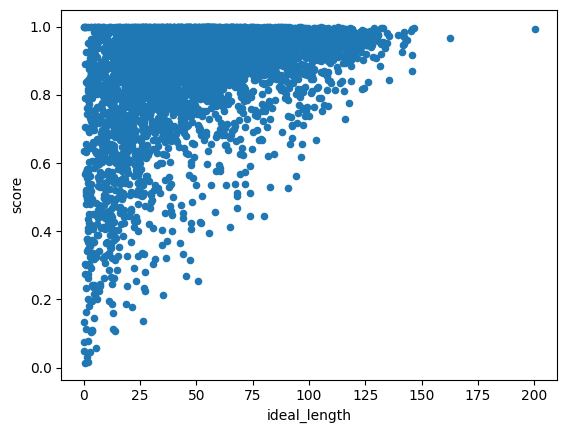

In [636]:
routes_df.plot(kind = "scatter", x = "ideal_length", y = "score")

In [642]:
routes_df.sort_values("score")["route_obj"].iloc[-1].visualize()

Canvas(height=400, width=400)

In [621]:
home_only_routes = routes_df[routes_df["player_id"].apply(lambda x: len(str(x)) == 3)]

<Axes: xlabel='player_id'>

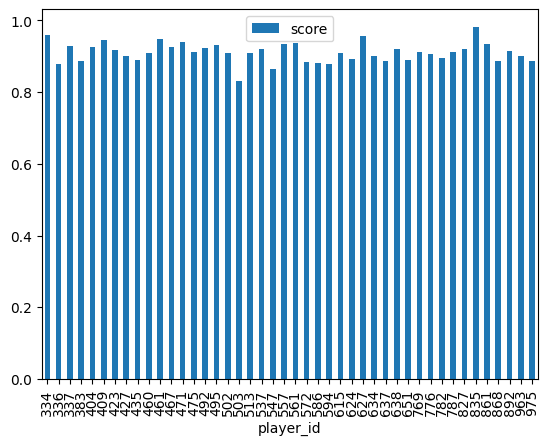

In [622]:
home_only_routes.groupby("player_id").agg({"level": "max", "score": "mean"}).plot(kind = "bar")

In [479]:
import PermHelpers

In [480]:
PermHelpers.calc_TVD(home_only_routes.groupby("player_id").agg({"level": "max", "score": "mean"}), home_only_routes["score"].mean())

0.4666179046064412

In [511]:
t = home_only_routes.copy(deep = True)
t["shuffled"] = t["player_id"].sample(frac = 1).values
PermHelpers.calc_TVD(t.groupby("shuffled").agg({"level": "max", "score": "mean"}), t["score"].mean())

0.6634048249218997

In [580]:
t = PermHelpers.permutation_tester(home_only_routes, "position", 1000)

Out of 1000 permutations, 14 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.014.
The observed statistic was 0.008825023264786902.
The average test statistic was 0.0037105012941114806


<Axes: xlabel='position'>

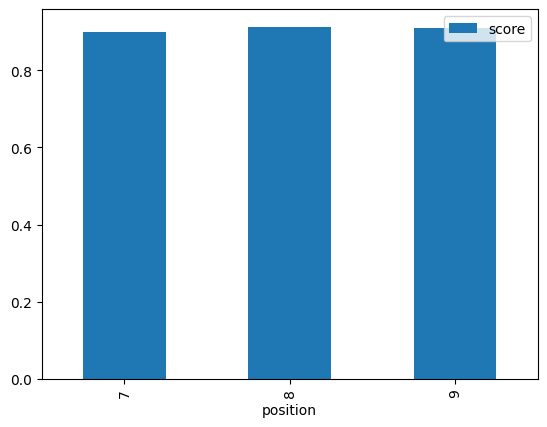

In [577]:
home_only_routes[["position", "score"]].groupby("position").mean().reset_index().plot(kind = "bar", x = "position", y = "score")

In [573]:
(.009187 + .005107 + .003356)*.5

0.008825000000000001

In [548]:
t[["shuffled", "score"]].groupby("shuffled").mean()

score
shuffled          
7         0.905446
8         0.914528
9         0.902548

In [623]:
PermHelpers.calc_TVD(home_only_routes, "position")

0.008825023264786902

In [558]:
PermHelpers.calc_TVD(t[["shuffled", "score"]].groupby("shuffled").mean(), t["score"].mean())

0.0048209196541147414

<Axes: xlabel='direction', ylabel='score'>

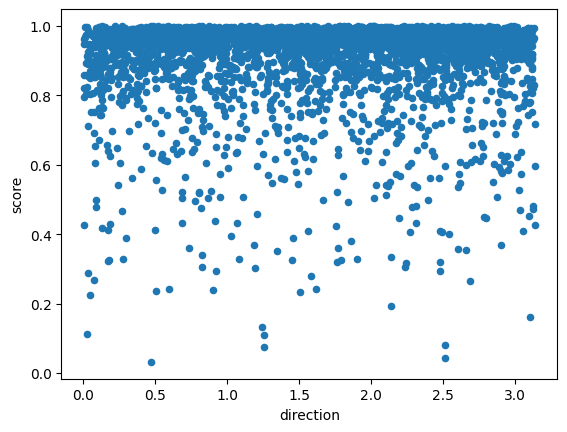

In [624]:
home_only_routes.plot(kind = "scatter", x = "direction", y = "score")

<Axes: xlabel='level'>

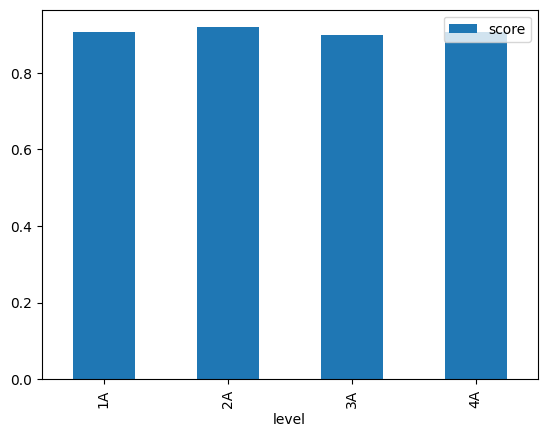

In [589]:
home_only_routes[["level", "score"]].groupby("level").mean().plot(kind = "bar")

In [654]:
Metric.route_efficiency.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 51 of 339
Finished game 101 of 339
no start coords
game skipped
Finished game 151 of 339
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
Finish

In [706]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


True

In [713]:
all_routes_df = Route.get_all_routes_df()

In [721]:
Metric.route_efficiency.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339
Out of 1000 permutations, 315 had a test statistic at least as

In [722]:
testr = Route.get_all_routes()[0]

In [727]:
pos = testr.get_coord_tuples()

<Axes: xlabel='xpos', ylabel='ypos'>

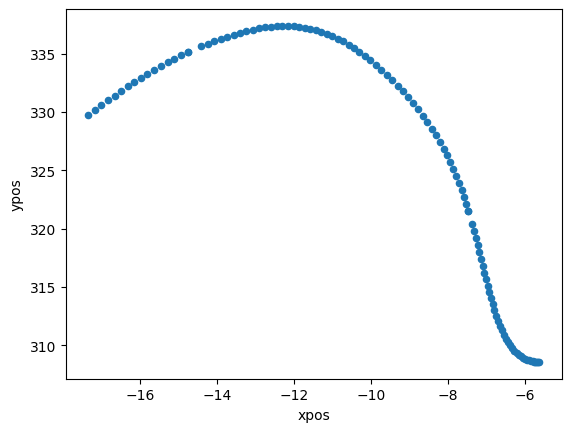

In [738]:
posdf = pd.DataFrame(columns = ["xpos", "ypos"], data = pos)
posdf.plot(kind = "scatter", x = "xpos", y = "ypos")

<Axes: xlabel='index', ylabel='mag'>

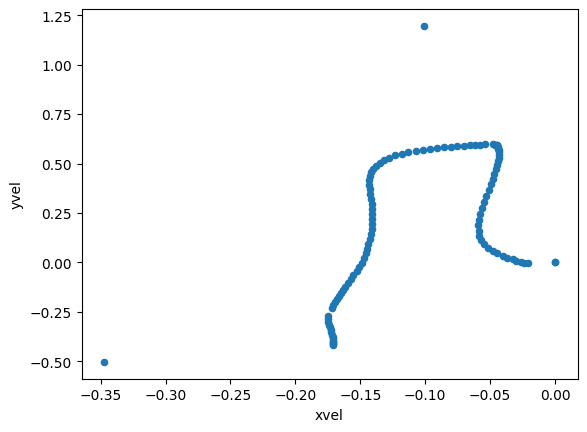

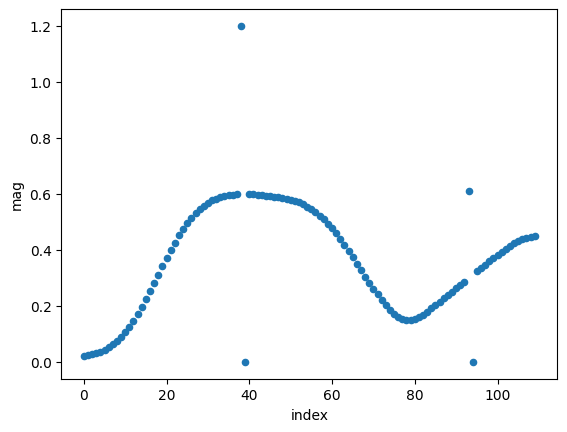

In [736]:
vel = []
for i in range(len(pos)-1):
    velvec = (pos[i+1][0] - pos[i][0], pos[i+1][1]-pos[i][1])
    vel.append((velvec[0], velvec[1], (velvec[0]**2 + velvec[1]**2)**.5))
veldf = pd.DataFrame(columns= ["xvel", "yvel", "mag"], data  = vel)
veldf.plot(kind = "scatter", x = "xvel", y = "yvel")
veldf = veldf.reset_index()
veldf.plot(kind = "scatter", x = "index", y = "mag")

<Axes: xlabel='index'>

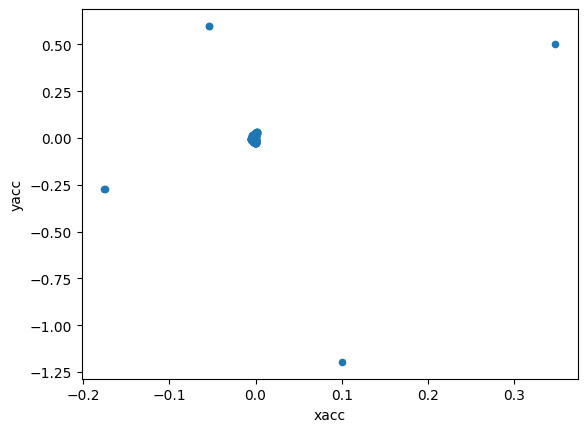

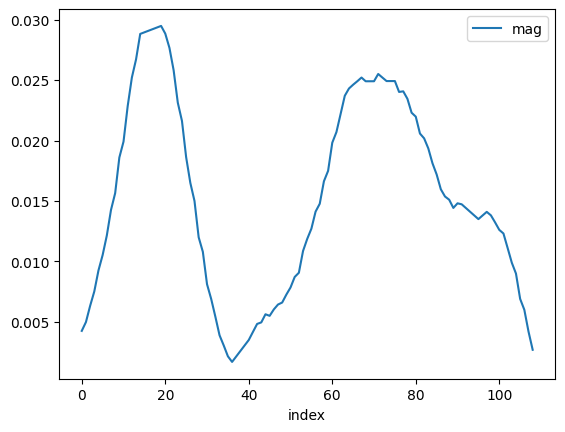

In [790]:
acc = []
for i in range(len(vel)-1):
    accvec = (vel[i+1][0] - vel[i][0], vel[i+1][1]-vel[i][1])
    acc.append((accvec[0], accvec[1], (accvec[0]**2 + accvec[1]**2)**.5))
accdf = pd.DataFrame(columns= ["xacc", "yacc", "mag"], data  = acc)
# accdf = accdf[
#     (accdf["xacc"] < .05) &
#     (accdf["xacc"] > -.05) &
#     (accdf["yacc"] > -.2) &
#     (accdf["yacc"] < .2)
# ]
accdf.plot(kind = "scatter", x = "xacc", y = "yacc")
accdf = accdf.reset_index()
accdf = accdf.sort_values("mag").iloc[:-10]
accdf = accdf.sort_values("index")
accdf.plot(kind = "line", x = "index", y = "mag")

In [752]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

<Axes: xlabel='index'>

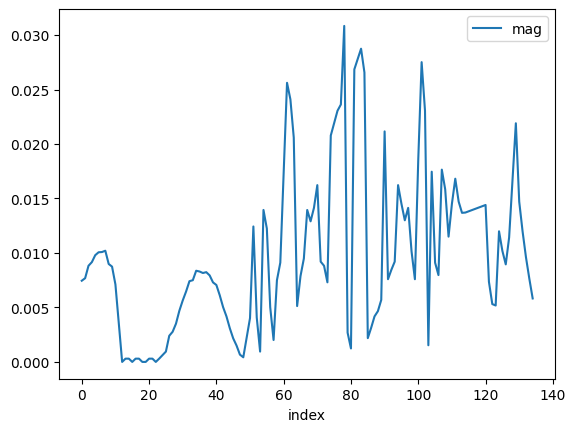

In [802]:
all_routes_df[all_routes_df["ideal_length"] >= 100]["route_obj"].iloc[5].visualize_accel()

<Axes: ylabel='Frequency'>

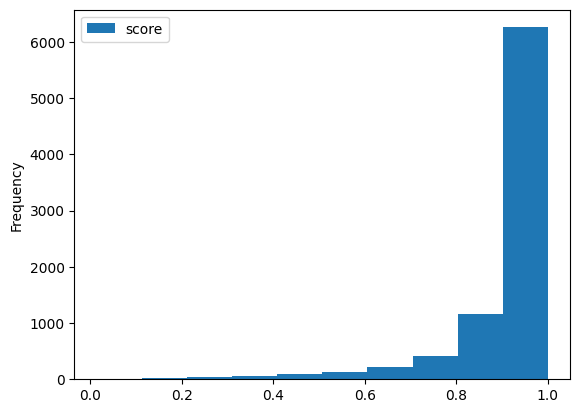

In [813]:
all_routes_df[["score"]].plot(kind = "hist")

<Axes: ylabel='Frequency'>

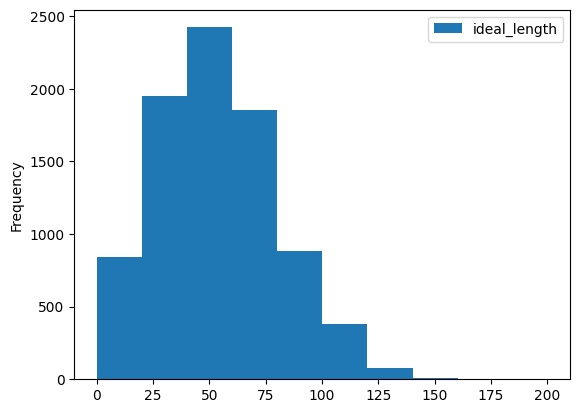

In [815]:
all_routes_df[["ideal_length"]].plot(kind = "hist")

In [816]:
Metric.break_metric.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 829 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.829.
This would NOT be considered statistically signifiant
-----
The observed statistic was 0.18528578214122013.
The average test statistic was 0.22958426426685738


In [820]:
t = Route.get_all_routes_df()[["score"]]

<Axes: ylabel='Frequency'>

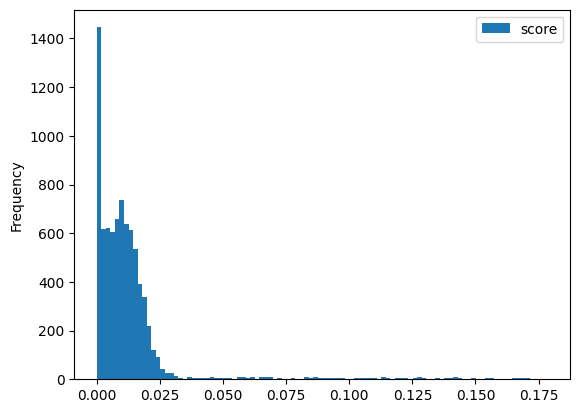

In [829]:
t.sort_values("score").iloc[:-300].plot(kind = "hist", bins = 100)

In [830]:
Metric.id_metric.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 0 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.0.
This would be considered statistically significant
-----
The observed statistic was 3165.3160070880085.
The average test statistic was 659.3705795749261


In [831]:
t = Route.get_all_routes_df()

In [875]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [876]:
df = Route.get_all_routes_df()

<Axes: xlabel='direction', ylabel='score'>

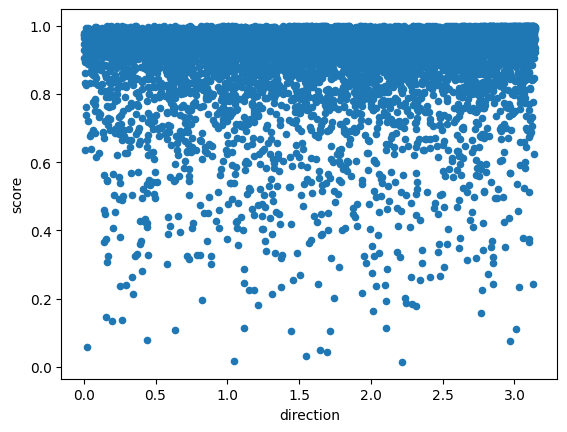

In [895]:
df.plot(kind = "scatter", x = "direction", y = "score")


In [896]:
Route.find_all_relevant(Metric.break_metric)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [897]:
df = Route.get_all_routes_df()

In [905]:
PermHelpers.permutation_tester(df[(df["ideal_length"] > 100) & (df["player_id"].apply(lambda x: len(str(x)) == 3))], "player_id", 1000)

Out of 1000 permutations, 185 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.185.
This would NOT be considered statistically signifiant
-----
The observed statistic was 0.8574052355298355.
The average test statistic was 0.7859941277844018


player_id     score  shuffled
528         492  0.013315       502
646         495  0.006661       513
710         492  0.000424       638
896         651  0.010151       572
956         637  0.000300       495
...         ...       ...       ...
8362        502  0.009159       868
8369        502  0.324840       975
8372        427  0.008653       963
8382        427  0.009144       651
8413        427  0.009661       651

[195 rows x 3 columns]

In [967]:
p = df["route_obj"].iloc[11].get_play()
p = p.loc[(p["event_code"] == 4).idxmax():(p["event_code"] == 2).idxmax()]
if 255 not in p["player_position"].values:
    print(p["timestamp"].iloc[-1] - p["timestamp"].iloc[0])
else:
    print("bounced")
    bounceonly = p.loc[:(p["player_position"] == 255).idxmax()]
    print(bounceonly["timestamp"].iloc[-1] - bounceonly["timestamp"].iloc[0])

bounced
1150


In [955]:
df["route_obj"].iloc[17].visualize()

Canvas(height=400, width=400)

In [1080]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:80: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [1081]:
ml_data = Route.get_all_routes_df()
ml_data["hang_time"] = ml_data["route_obj"].apply(lambda x: x.get_hang_time())
ml_data["was_caught"] = ml_data["route_obj"].apply(lambda x: int(x.get_was_caught()))
model = Model.create_model(ml_data)
with_pred = pd.concat([ml_data, pd.Series(model.predict(ml_data[["direction", "ideal_length", "hang_time"]])).rename("pred")], axis = 1)
1 - np.abs(with_pred["was_caught"] - with_pred["pred"]).sum() / with_pred.shape[0]
with_proba = pd.concat([ml_data, pd.DataFrame(model.predict_proba(ml_data[["direction", "ideal_length", "hang_time"]]))], axis = 1)

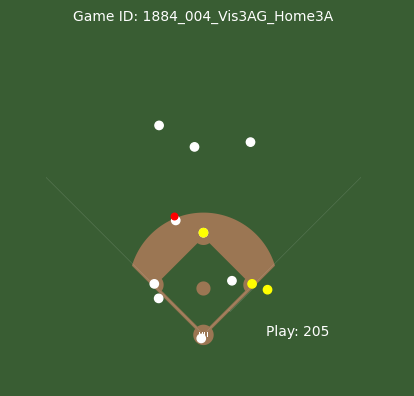

In [1111]:
with_proba[with_proba["was_caught"] == 1].sort_values(1)["route_obj"].iloc[4000].visualize()

In [1113]:
with_proba["OOA"] = with_proba["was_caught"] - with_proba[1]

In [1119]:
home_with_proba = with_proba[with_proba["player_id"].apply(lambda x: len(str(x)) == 3)]
summed = home_with_proba[["player_id", "was_caught", 1, "OOA"]].groupby("player_id").sum()
summed.sort_values("OOA")

was_caught           1       OOA
player_id                                  
572                35   42.468797 -7.468797
624                38   42.315039 -4.315039
383                 5    9.257709 -4.257709
638                56   59.495472 -3.495472
651               118  121.368414 -3.368414
868                28   31.137875 -3.137875
404                23   25.190989 -2.190989
427                40   42.172855 -2.172855
471                19   20.873905 -1.873905
827                 7    8.354835 -1.354835
467                16   17.344633 -1.344633
776                36   37.162621 -1.162621
435                78   79.147564 -1.147564
547                28   29.143775 -1.143775
557                 2    2.843290 -0.843290
561                 4    4.571619 -0.571619
627                 4    4.483283 -0.483283
782                 0    0.000072 -0.000072
835                 0    0.000031 -0.000031
503                 1    0.978327  0.021673
769                 1    0.967977  0.032023
334                 2    1.899204  0.100796
861                17   16.889504  0.110496
475               108  107.667299  0.332701
409                 4    3.568980  0.431020
502                36   35.432172  0.567828
637                19   18.331889  0.668111
336                 6    5.260878  0.739122
461                16   15.226285  0.773715
586                14   13.208046  0.791954
634                10    9.105886  0.894114
537                79   78.001832  0.998168
594                26   24.583853  1.416147
423                 8    5.336206  2.663794
492                97   94.176873  2.823127
513                72   69.172304  2.827696
787                33   30.128084  2.871916
615                66   62.873821  3.126179
495               114  110.445970  3.554030
337                42   38.073787  3.926213
892                95   90.674906  4.325094
975                74   68.718847  5.281153
460                71   64.706494  6.293506
963               117  110.350238  6.649762

<Axes: xlabel='player_id'>

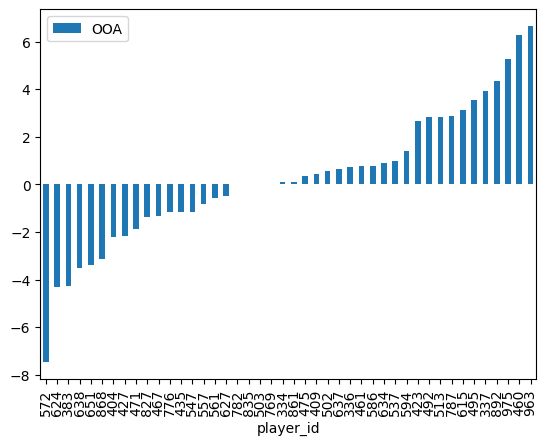

In [1128]:
summed.sort_values("OOA").reset_index().plot(kind = "bar", x = "player_id", y = "OOA")

<Axes: xlabel='player_id'>

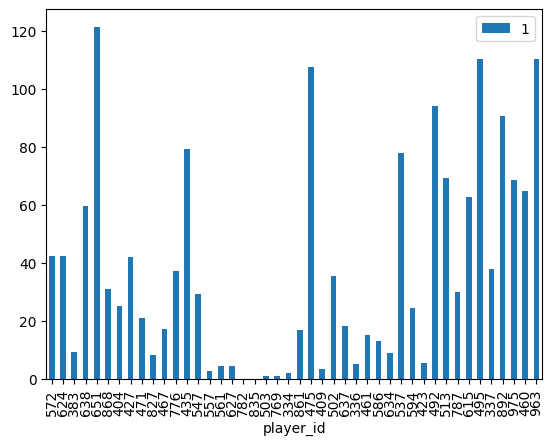

In [1130]:
summed.reset_index().sort_values("OOA").plot(kind = "bar", x = "player_id", y = 1)

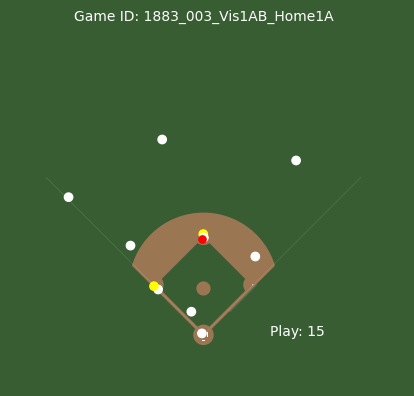

In [1133]:
home_with_proba["route_obj"].iloc[2].visualize()

Null hypothesis with OOA: A player's chance of catching the ball is only dependant on the general probability that the ball is caught and has nothing to do with the player's intrinsic qualities. Thus randomly assigning a catch based on the catch probability should result in a similar distribution of cumulative OOA. Our test statistic will be the L1 norm. Alternate hypothesis: cumulative OOA does in fact depend on more than just the catch probabilities.

In [1140]:
observed_stat = np.abs(summed["OOA"]).sum()
observed_stat

92.55311882537224

In [1156]:
stats = []
N = 1000
for _ in range(N):
    with_rand = home_with_proba[["player_id", "was_caught", 1]]
    with_rand["rand"] = with_rand[1].apply(lambda x: int(np.random.random() < x))
    with_rand["random_OOA"] = with_rand["rand"].apply(int)- with_rand[1]
    with_rand_summed = with_rand.groupby("player_id").sum()
    stats.append(np.abs(with_rand_summed["random_OOA"]).sum())

In [1159]:
(np.array(stats) >= observed_stat).sum() / N

0.0

This is evidence that a player's OOA depends on more than just the plays that went their way, and suggests that OOA tells you something about a player's intrinsic skills. In randomized tests, the OOA was significantly closer to 0 than in our world.

<Axes: xlabel='hang_time', ylabel='1'>

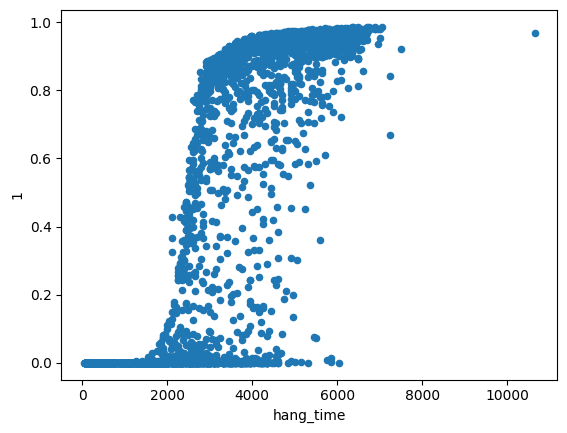

In [1164]:
home_with_proba.plot(kind = "scatter", x = "hang_time", y = 1)

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

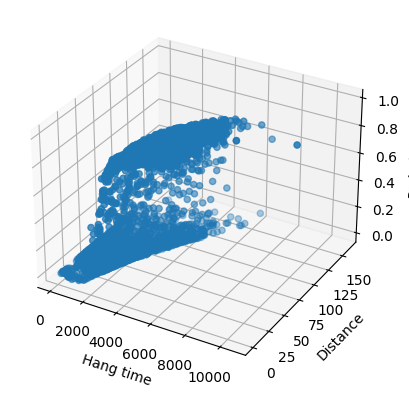

In [1172]:
threeD_fig = plt.figure()
threeD_plot = threeD_fig.add_subplot(projection="3d")
threeD_plot.scatter(home_with_proba["hang_time"], home_with_proba["ideal_length"], home_with_proba[1])
threeD_plot.set_xlabel('Hang time')
threeD_plot.set_ylabel('Distance')
threeD_plot.set_zlabel('Probability')
plt.show()

<Axes: ylabel='Frequency'>

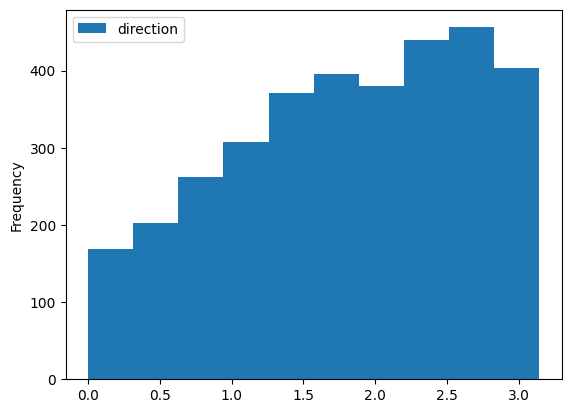

In [1176]:
home_with_proba[["direction"]].plot(kind = "hist")

In [1213]:
testtups = home_with_proba[home_with_proba["ideal_length"] >= 100]["route_obj"].iloc[3].get_vel_tuples()
mags = []
for tup in testtups:
    mags.append(tup[2]*20)
max(mags)

15.863864976732229

In [1225]:
testtups = home_with_proba[(home_with_proba["ideal_length"] >= 100) & (home_with_proba[1] <= .5)]["route_obj"].iloc[3].get_vel_tuples()
mags = []
for tup in testtups:
    mags.append(tup[2]*20)
max(mags)

15.863864976732229

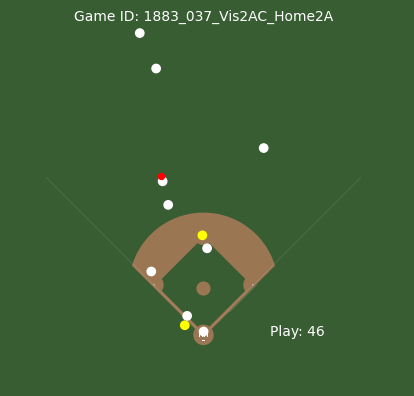

In [1226]:
home_with_proba[(home_with_proba["ideal_length"] >= 100) & (home_with_proba[1] <= .5)]["route_obj"].iloc[3].visualize()

In [1497]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:80: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [1498]:
ml_data = Route.get_all_routes_df()
ml_data["hang_time"] = ml_data["route_obj"].apply(lambda x: x.get_hang_time())
ml_data["was_caught"] = ml_data["route_obj"].apply(lambda x: int(x.get_was_caught()))
model = Model.create_model(ml_data)
with_pred = pd.concat([ml_data, pd.Series(model.predict(ml_data[["direction", "ideal_length", "hang_time"]])).rename("pred")], axis = 1)
1 - np.abs(with_pred["was_caught"] - with_pred["pred"]).sum() / with_pred.shape[0]
with_proba = pd.concat([ml_data, pd.DataFrame(model.predict_proba(ml_data[["direction", "ideal_length", "hang_time"]]))], axis = 1)

In [1499]:
with_proba["OOA"] = with_proba["was_caught"] - with_proba[1]
home_with_proba = with_proba[with_proba["player_id"].apply(lambda x: len(str(x)) == 3)]
home_with_proba_summed = home_with_proba[["player_id", "OOA"]].groupby("player_id").sum()
home_with_proba_summed = home_with_proba_summed.reset_index()
home_with_proba_summed["top_speed"] = home_with_proba_summed["player_id"].apply(lambda x: Player.get_existing_players()[x].get_top_speed())

In [1500]:
home_with_proba_summed["num_routes"] = home_with_proba_summed["player_id"].apply(lambda x: len(Player.get_existing_players()[x].get_routes()))

<Axes: xlabel='num_routes', ylabel='OOA'>

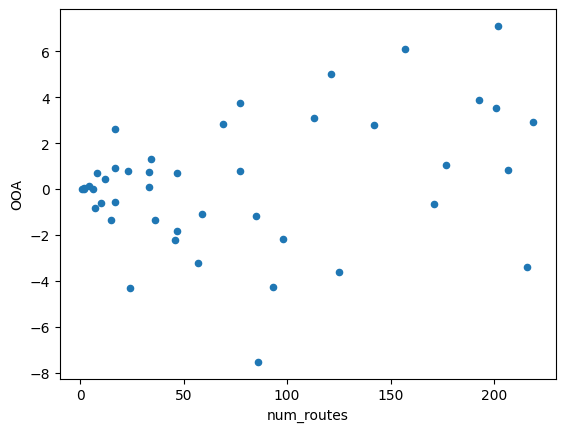

In [1501]:
home_with_proba_summed.plot(kind = "scatter", x = "num_routes", y = "OOA")

In [1502]:
home_with_proba_summed["OOA_per_route"] = home_with_proba_summed["OOA"] / home_with_proba_summed["num_routes"]

In [1503]:
home_with_proba_summed.sort_values("OOA_per_route")

player_id       OOA  top_speed  num_routes  OOA_per_route
3         383 -4.290232  29.119517          24      -0.178760
21        557 -0.822745  16.509143           7      -0.117535
37        827 -1.341824  24.123039          15      -0.089455
23        572 -7.533689  27.334520          86      -0.087601
22        561 -0.602428  29.041301          10      -0.060243
40        868 -3.203260  27.456617          57      -0.056198
4         404 -2.224147  26.671285          46      -0.048351
27        624 -4.272207  32.031710          93      -0.045938
12        471 -1.833060  30.195307          47      -0.039001
11        467 -1.339197  28.075901          36      -0.037200
28        627 -0.564989  30.302165          17      -0.033235
31        638 -3.592031  28.965686         125      -0.028736
7         427 -2.194837  29.297357          98      -0.022396
20        547 -1.101027  29.121761          59      -0.018661
32        651 -3.381224  31.014629         216      -0.015654
34        776 -1.184736  29.727119          85      -0.013938
8         435 -0.659585  31.300108         171      -0.003857
38        835 -0.000011  26.041664           1      -0.000011
35        782 -0.000045  24.532330           6      -0.000007
39        861  0.090246  27.667969          33       0.002735
13        475  0.812198  29.399397         207       0.003924
19        537  1.047032  35.695957         177       0.005915
17        503  0.017069  24.434028           2       0.008535
16        502  0.794323  28.540943          77       0.010316
14        492  2.912199  33.364444         219       0.013298
33        769  0.030177  21.619383           2       0.015088
30        637  0.711024  32.071734          47       0.015128
15        495  3.541528  31.848663         201       0.017620
18        513  2.787906  31.304343         142       0.019633
41        892  3.884216  32.233998         193       0.020125
24        586  0.740444  25.900640          33       0.022438
26        615  3.111684  31.678139         113       0.027537
10        461  0.772348  25.254852          23       0.033580
0         334  0.137438  22.129975           4       0.034359
42        963  7.114904  30.863093         202       0.035222
5         409  0.446178  26.198772          12       0.037181
25        594  1.319527  28.955535          34       0.038810
9         460  6.101477  30.664267         157       0.038863
36        787  2.835226  32.250809          69       0.041090
43        975  5.036335  30.474158         121       0.041623
2         337  3.761228  31.051109          77       0.048847
29        634  0.900455  26.132624          17       0.052968
1         336  0.707534  28.536837           8       0.088442
6         423  2.623373  30.556396          17       0.154316

<Axes: xlabel='num_routes', ylabel='top_speed'>

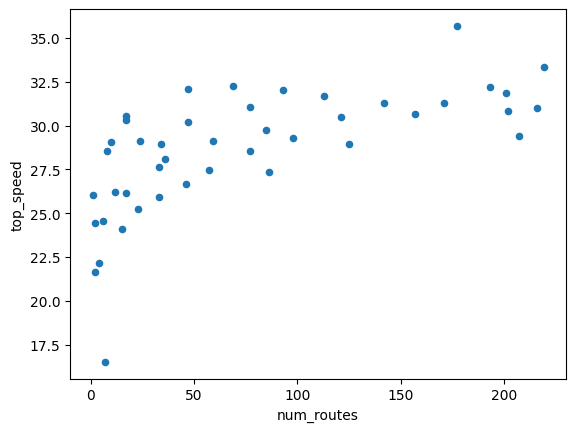

In [1517]:
home_with_proba_summed.plot(kind = "scatter", x = "num_routes", y = "top_speed")

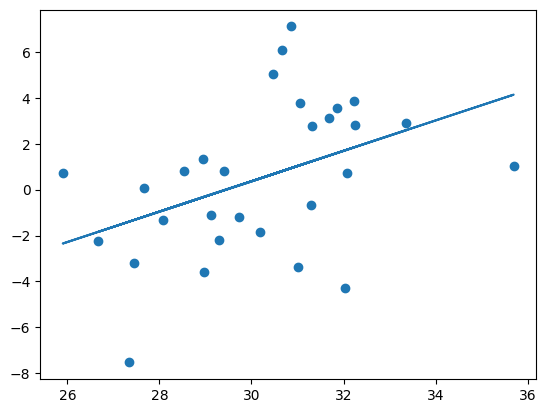

In [1521]:
twentyfiveonly =home_with_proba_summed[home_with_proba_summed["num_routes"] >= 25]
x = twentyfiveonly["top_speed"]
y = twentyfiveonly["OOA"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x, y)
plt.plot(x, p(x))

In [1479]:
r = home_with_proba["route_obj"].iloc[2]

In [1480]:
df = pd.DataFrame(r.get_coord_tuples())
df.columns = ["xpos", "ypos"]
avnum = 10
df["avhelps"] = np.floor(np.array(range(df.shape[0]))/avnum)*avnum
df = df.groupby("avhelps").mean()
df = df.reset_index()
df["xvel"] = df["xpos"].shift(-1) - df["xpos"] 
df["yvel"] = df["ypos"].shift(-1) - df["ypos"]
df["xacc"] = df["xvel"].shift(-1) - df["xvel"]
df["yacc"] = df["yvel"].shift(-1) - df["yvel"]
# df.plot(kind = "scatter", x = "xpos", y = "ypos")
# df.plot(kind = "scatter", x = "xvel", y = "yvel")
# df.head(20).plot(kind = "scatter", x = "avhelps", y = "xvel")
t = df.iloc[8]
(t["xvel"]**2 + t["yvel"]**2)**.5*2

19.836566447901234

In [1404]:
from scipy.interpolate import splprep, splev

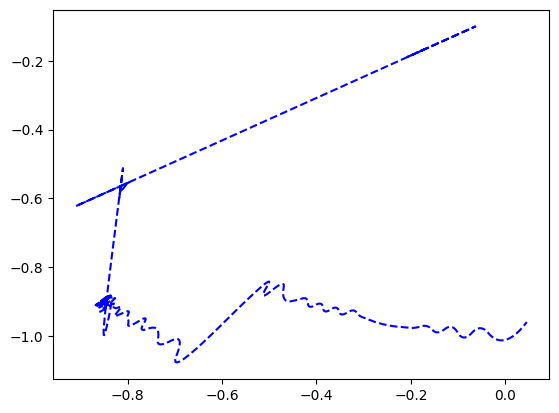

In [1433]:
df = pd.DataFrame(r.get_coord_tuples())
df.columns = ["xpos", "ypos"]
avnum = 1
df["avhelps"] = np.floor(np.array(range(df.shape[0]))/avnum)*avnum
df = df.groupby("avhelps").mean()
df = df.reset_index()
df["xvel"] = df["xpos"].shift(-1) - df["xpos"] 
df["yvel"] = df["ypos"].shift(-1) - df["ypos"]
df["xacc"] = df["xvel"].shift(-1) - df["xvel"]
df["yacc"] = df["yvel"].shift(-1) - df["yvel"]
pts = df[["xpos", "ypos"]].to_numpy()
tck, u = splprep(pts.T, u= df["avhelps"].to_numpy(), s=0.0, per=0) 
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=1)

#plt.plot(pts[:,0], pts[:,1], 'ro')
plt.plot(x_new, y_new, 'b--')
plt.show()

<Axes: xlabel='xpos', ylabel='ypos'>

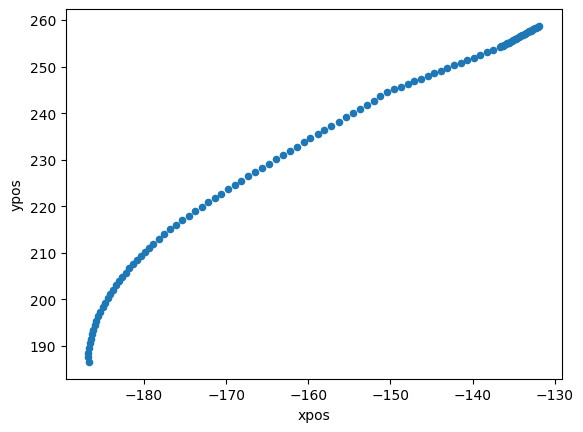

In [1429]:
df.plot(kind = "scatter", x = "xpos", y = "ypos")

In [1469]:
t = pd.DataFrame(r.get_coord_tuples())
m = (t[0]**2 + t[1]**2)**.5
list(zip(t[0], t[1], m))

[(-131.898, 258.7476, 290.4262434935245),
 (-132.0747, 258.5778, 290.35530825684936),
 (-132.2514, 258.4077, 290.28429551260604),
 (-132.4281, 258.2379, 290.2137396230923),
 (-132.6045, 258.0678, 290.14296961513645),
 (-132.7812, 257.8977, 290.072526687258),
 (-132.9579, 257.7279, 290.0025406971808),
 (-133.1346, 257.5578, 289.93247844627547),
 (-133.3113, 257.388, 289.86287318608083),
 (-133.488, 257.2179, 289.79319216367037),
 (-133.6647, 257.0481, 289.7239681829931),
 (-133.8414, 256.878, 289.6546689386518),
 (-134.0181, 256.7082, 289.58582678516916),
 (-134.1948, 256.5381, 289.51690986650505),
 (-134.3712, 256.368, 289.44804510212185),
 (-134.5479, 256.1982, 289.37977655262983),
 (-134.7246, 256.0281, 289.31143398554093),
 (-134.9013, 255.8583, 289.2435486239581),
 (-135.078, 255.6882, 289.17558974304865),
 (-135.2547, 255.5184, 289.10808811005273),
 (-135.4314, 255.3483, 289.04051345589943),
 (-135.6081, 255.1782, 288.97313117459555),
 (-135.7848, 255.0084, 288.9062062012514),
 (-

In [1493]:
veltups = pd.DataFrame(r.get_vel_tuples())
# shift by 10 means that it takes average speeds over half seconds
xshifts = veltups[0].shift(-10) - veltups[0]
yshifts = veltups[1].shift(-10) - veltups[1]
mags = (xshifts**2 + yshifts**2)**.5
pd.DataFrame(list(zip(xshifts, yshifts, mags)))[2].max()*2

1.4931512046674822

In [5]:
Route.find_all_relevant([Metric.route_efficiency, Metric.break_metric, Metric.id_metric, Metric.statcast_jump])

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:81: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [6]:
all_routes_df = Route.get_all_routes_df()

In [11]:
all_routes_df["hang_time"] = all_routes_df["route_obj"].apply(lambda x: x.get_hang_time())
all_routes_df["was_caught"] = all_routes_df["route_obj"].apply(lambda x: x.get_was_caught())
mod = Model.create_model(all_routes_df)

In [23]:
df = pd.concat([all_routes_df, pd.Series(mod.predict(all_routes_df[["direction", "ideal_length", "hang_time"]])).rename("pred")], axis = 1)

In [27]:
df = pd.concat([df, pd.DataFrame(mod.predict_proba(all_routes_df[["direction", "ideal_length", "hang_time"]]))], axis = 1)

In [30]:
df["OOA"] = df["was_caught"].apply(int) - df[1]

<Axes: xlabel='statcast jump', ylabel='OOA'>

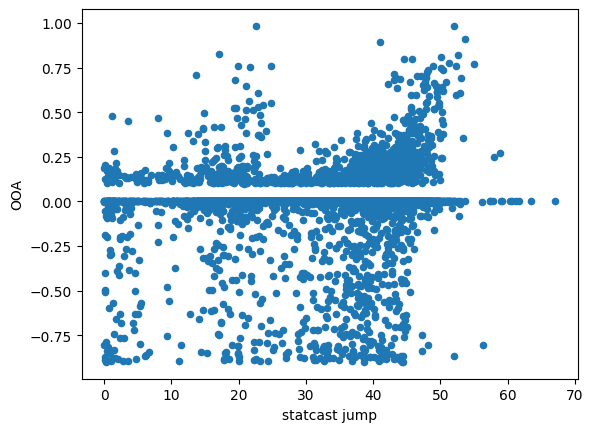

In [51]:
df[(df["statcast jump"] > 0) & (df[1] < .9)].plot(kind = "scatter", x = "statcast jump", y = "OOA")

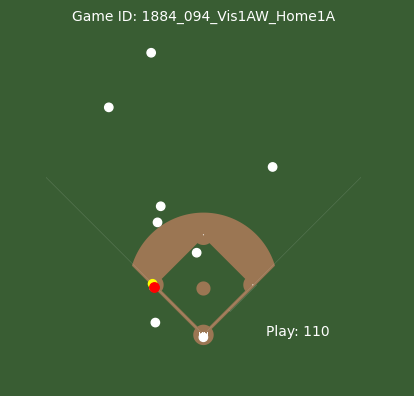

In [60]:
df[(df["statcast jump"] > 55) & (df["OOA"] < -.75)]["route_obj"].iloc[0].visualize()

In [62]:
home_df = df[df["player_id"].apply(lambda x: len(str(x)) == 3)]

In [67]:
home_df_hard = home_df[(home_df[1] <= .9) & (home_df["statcast jump"] != -1)]

In [93]:
by_player = home_df_hard[["player_id", "route efficiency", "acc mag break", "statcast jump", "OOA", "direction"]].groupby("player_id").agg(
    {
        "route efficiency": "mean",
        "acc mag break": "mean",
        "statcast jump": "mean",
        "OOA": "sum",
        "direction": "count"
    }
)
by_player = by_player.reset_index()
by_player.columns = ["player_id", "route efficiency", "acc mag break", "statcast jump", "OOA", "num routes"]
by_player["OOA"] = np.round(by_player["OOA"], 2)

In [95]:
by_player["OOA per route"] = by_player["OOA"] / by_player["num routes"]
by_player["top speed"] = by_player["player_id"].apply(lambda x: Player.get_existing_players()[x].get_top_speed())

<Axes: xlabel='statcast jump', ylabel='OOA per route'>

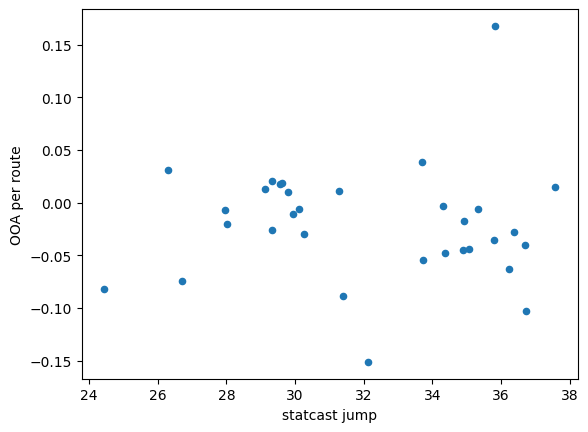

In [98]:
by_player[by_player["num routes"] >= 10].plot(kind = "scatter", x = "statcast jump", y = "OOA per route")

<Axes: xlabel='top speed', ylabel='OOA per route'>

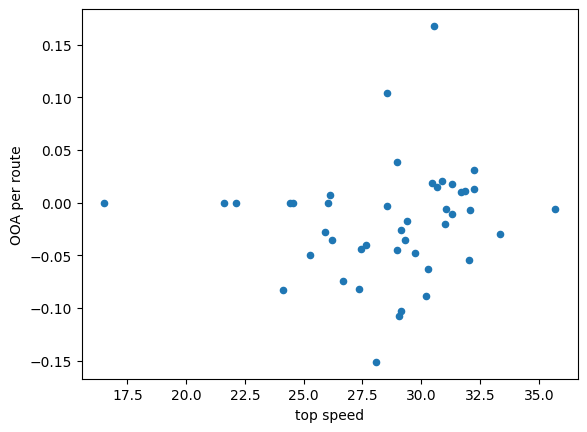

In [102]:
by_player.plot(kind = "scatter", x = "top speed", y = "OOA per route")

<Axes: xlabel='num routes', ylabel='OOA'>

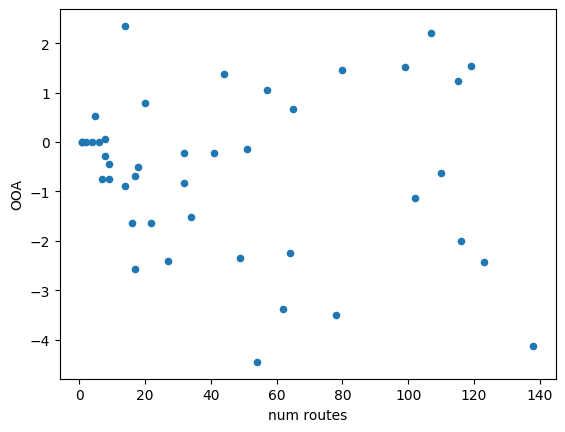

In [103]:
by_player.plot(kind = "scatter", x = "num routes", y = "OOA")

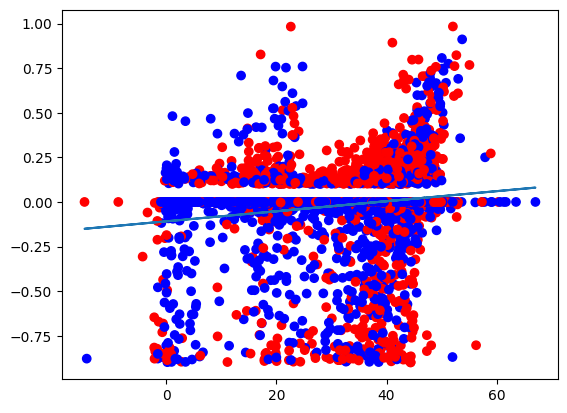

In [181]:
to_trend = df[
    (df["statcast jump"] != -1)
    & (df[1] <= .9)
    # & (df["ideal_length"] / df["hang_time"] >= 15/1000)
]
to_trend["color"] = to_trend["direction"].apply(lambda x: "red" if x <= np.pi / 2 else "blue")
x = to_trend["statcast jump"]
y = to_trend["OOA"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x, y, c = to_trend["color"])
plt.plot(x, p(x))

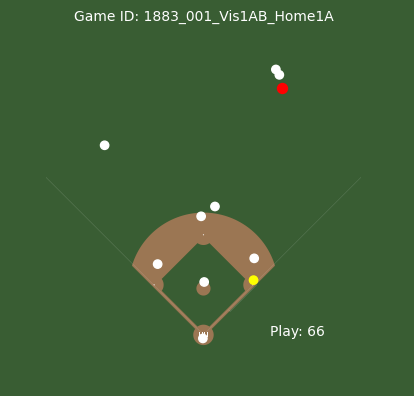

In [172]:
to_trend[to_trend["color"] == "red"].iloc[0]["route_obj"].visualize()

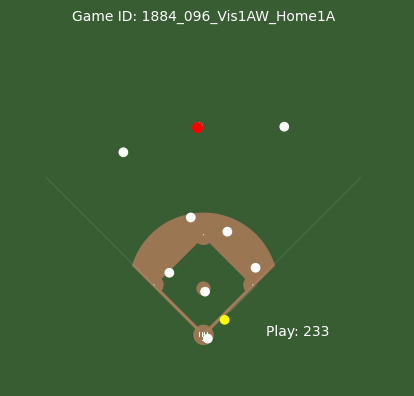

In [126]:
df[(df["statcast jump"] < 15) & (df["OOA"] > .6) & (df["statcast jump"] != -1)].iloc[0]["route_obj"].visualize()

In [156]:
Metric.statcast_jump.test_metric(1000)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:81: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 1 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.001.
This would be considered statistically significant
-----
The observed statistic was 85.81282557320888.
The average test statistic was 55.40444709306522


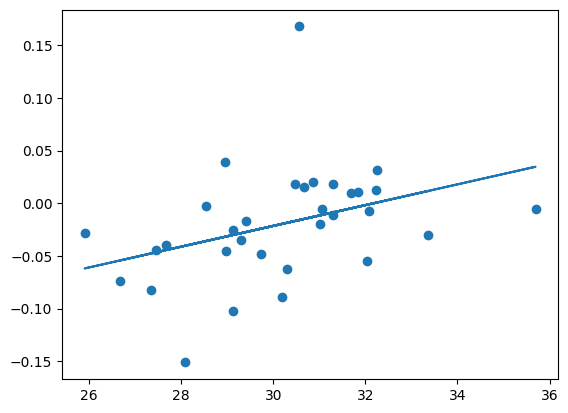

In [179]:
ten_routes = by_player[by_player["num routes"] >= 10]
x = ten_routes["top speed"]
y = ten_routes["OOA per route"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x, y)
plt.plot(x, p(x))

In [173]:
Metric.statcast_reaction.test_metric(1000)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:81: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 0 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.0.
This would be considered statistically significant
-----
The observed statistic was 30.68669699062546.
The average test statistic was 16.06744255327018


<Axes: xlabel='statcast jump', ylabel='statcast reaction'>

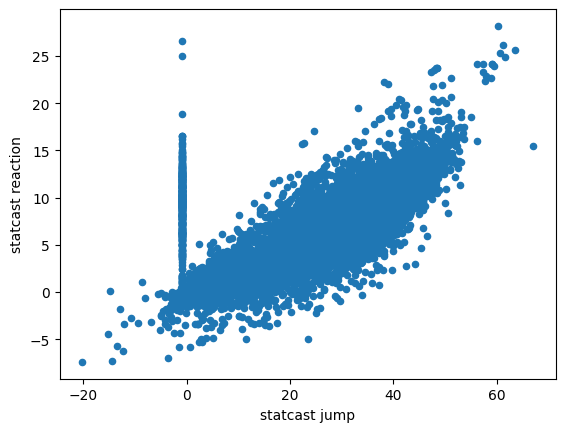

In [175]:
Route.get_all_routes_df().plot(kind = "scatter", x = "statcast jump", y = "statcast reaction")

In [234]:
start = (-50, 50)
retrieve = (-75, 50)
direcvec = (retrieve[0] - start[0], retrieve[1] - start[1])
np.arctan2(start[1], start[0]) - np.arctan2(direcvec[1], direcvec[0])

-0.7853981633974483

In [359]:
Route.find_all_relevant([Metric.statcast_jump, Metric.statcast_reaction])

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:81: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [360]:
df = Route.get_all_routes_df()

In [361]:
df["was_caught"] = df["route_obj"].apply(lambda x: x.get_was_caught())
df["hang_time"] = df["route_obj"].apply(lambda x: x.get_hang_time())

In [362]:
mod = Model.create_model(df)

In [363]:
with_pred = df.copy(deep = True)
with_pred["pred"] = mod.predict(df[["direction", "ideal_length", "hang_time"]])

In [364]:
1 - np.abs(with_pred["was_caught"].apply(int) - with_pred["pred"].apply(int)).sum() / with_pred.shape[0]

0.9320400048198578

In [365]:
with_proba = with_pred.copy(deep = True)
with_proba = pd.concat([with_proba, pd.DataFrame(mod.predict_proba(with_proba[["direction", "ideal_length", "hang_time"]]))[1].rename("Catch Probability")], axis = 1)

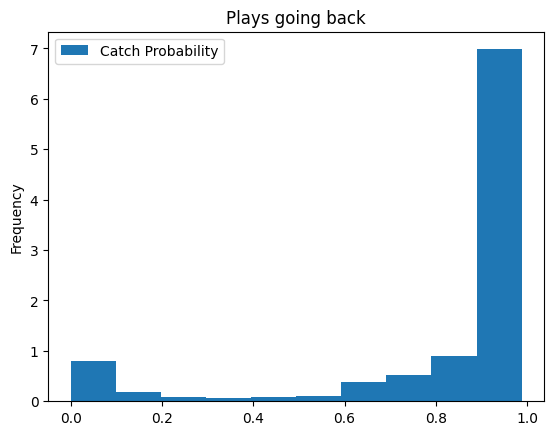

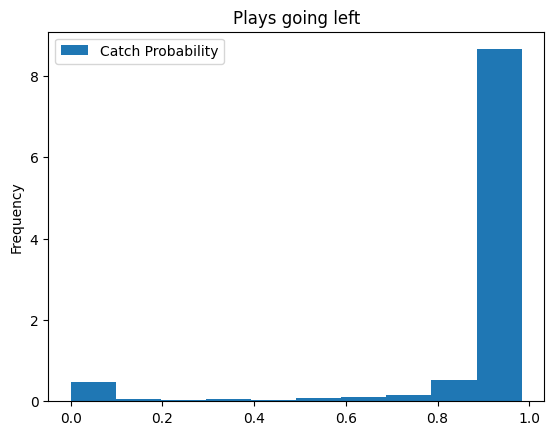

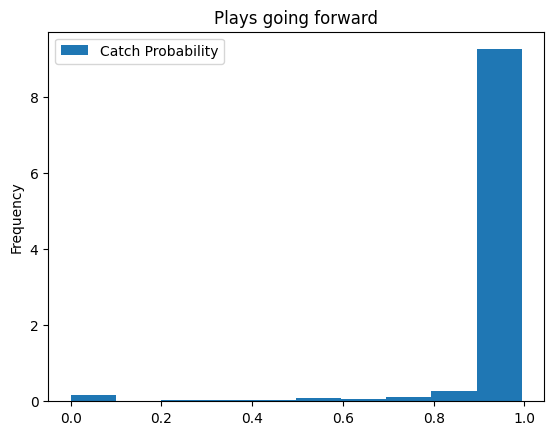

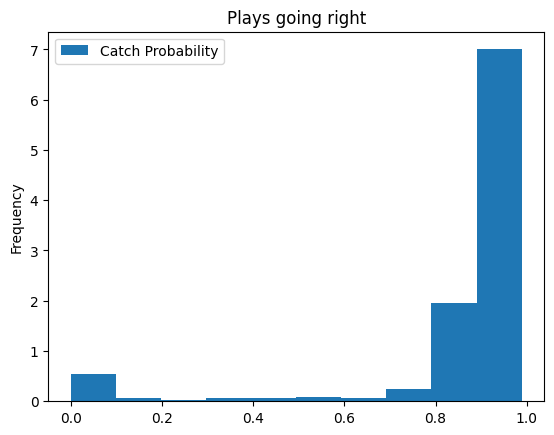

In [366]:
flyballsonly = with_proba[with_proba["hang_time"] >= 4000]
for direc in ["back", "left", "forward", "right"]:
    flyballsonly[flyballsonly["direction"] == direc][["Catch Probability"]].plot(kind = "hist", title = f"Plays going {direc}", density = True)

<Axes: ylabel='Frequency'>

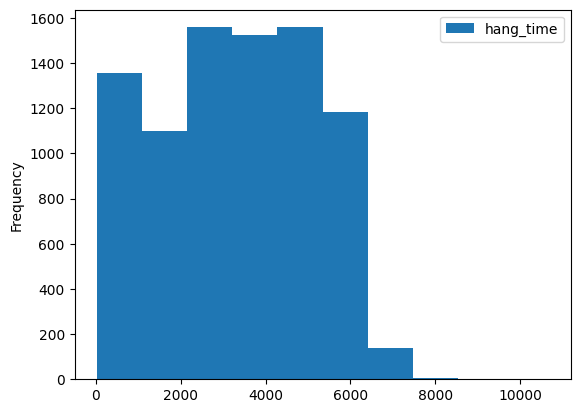

In [266]:
with_proba[["hang_time"]].plot(kind = "hist")

In [387]:
with_proba["got_to"] = with_proba["route_obj"].apply(lambda x: x.get_got_to())

In [398]:
with_proba[(with_proba["got_to"]) & -(with_proba["was_caught"])].groupby("direction").count()

route_obj  game_str  player_id  position  level  ideal_length  \
direction                                                                  
back               8         8          8         8      8             8   
forward            9         9          9         9      9             9   
left               3         3          3         3      3             3   
right              6         6          6         6      6             6   

           statcast jump  statcast reaction  was_caught  hang_time  pred  \
direction                                                                  
back                   8                  8           8          8     8   
forward                9                  9           9          9     9   
left                   3                  3           3          3     3   
right                  6                  6           6          6     6   

           Catch Probability  got_to  
direction                             
back                       8       8  
forward                    9       9  
left                       3       3  
right                      6       6

In [399]:
with_proba.groupby("direction").count()

route_obj  game_str  player_id  position  level  ideal_length  \
direction                                                                  
back            1242      1242       1242      1242   1242          1242   
forward         2640      2640       2640      2640   2640          2640   
left            2072      2072       2072      2072   2072          2072   
right           2345      2345       2345      2345   2345          2345   

           statcast jump  statcast reaction  was_caught  hang_time  pred  \
direction                                                                  
back                1242               1242        1242       1242  1242   
forward             2640               2640        2640       2640  2640   
left                2072               2072        2072       2072  2072   
right               2345               2345        2345       2345  2345   

           Catch Probability  got_to  
direction                             
back                    1242    1242  
forward                 2640    2640  
left                    2072    2072  
right                   2345    2345

<Axes: xlabel='direction', ylabel='statcast reaction'>

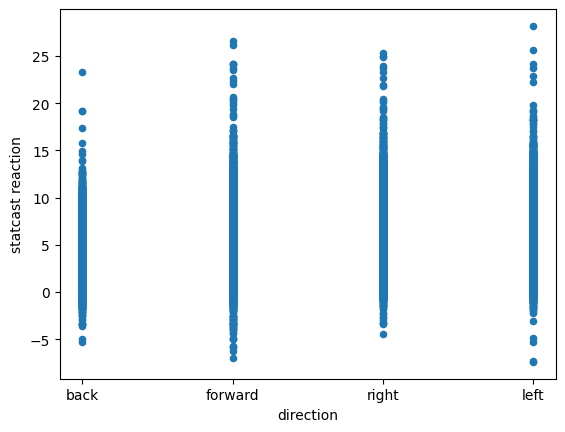

In [402]:
with_proba.plot(kind = "scatter", x = "direction", y = "statcast reaction")